In [3]:
#Walmart sale analysis Major project
import pandas as pd
import numpy as np
from numpy import *


In [4]:
#importing datetime functionalities
from datetime import datetime
from datetime import timedelta

In [5]:
#for statistics 
import math
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

In [6]:
#Nice graphing tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Machine learning tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse

In [8]:
#for debugging
import gc
import time
import warnings
import os

In [9]:
## Performance measures
from sklearn.metrics import mean_squared_error

In [10]:
print('Reading data...')

Reading data...


In [11]:
print(os.listdir('G:/College-sem7/MajorProjectData/wallmart-sales-forecast-datasets'))

['features.csv', 'sampleSubmission.csv', 'stores.csv', 'test.csv', 'train.csv']


In [12]:
dataSource = 2
if dataSource==1:
    train = mergeData(pd.read_csv('G:/College-sem7/MajorProjectData/wallmart-sales-forecast-datasets/train.csv'))
    test = mergeData(pd.read_csv('G:/College-sem7/MajorProjectData/wallmart-sales-forecast-datasets/test.csv'))
    features = mergeData(pd.read_csv('G:/College-sem7/MajorProjectData/wallmart-sales-forecast-datasets/features.csv'))
    train['Split'] = 'Train'
    test['Split'] = 'Test'
    test.head()
else: 
    train = pd.read_csv('G:/College-sem7/MajorProjectData/course-material-walmart-challenge/train.csv')
    test = pd.read_csv('G:/College-sem7/MajorProjectData/course-material-walmart-challenge/test.csv')
    features = pd.read_csv('G:/College-sem7/MajorProjectData/wallmart-sales-forecast-datasets/features.csv')
    train['Split'] = 'Train'
    test['Split'] = 'Test'
    test.head()

In [13]:
train.head()
# Get an overview of the train data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Split
0,1,1,2010-02-05,24924.50,False,Train
1,1,1,2010-02-12,46039.49,True,Train
2,1,1,2010-02-19,41595.55,False,Train
3,1,1,2010-02-26,19403.54,False,Train
4,1,1,2010-03-05,21827.90,False,Train


In [14]:
test.head()
# Get an overview of the test data

,Store,Dept,Date,IsHoliday,Split
0,1,1,2012-11-02,False,Test
1,1,1,2012-11-09,False,Test
2,1,1,2012-11-16,False,Test
3,1,1,2012-11-23,True,Test
4,1,1,2012-11-30,False,Test


In [15]:
features.head()
# Get an overview of the features data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
#For Data Cleaning
#Check in for any inConsistent column name
#Check in for missing data
# check for any outlier

In [17]:
#Inconsistent column manes
# Change to Upper Case
# Rename them 
# df.rename(columns={"old_col_name":"new_col_name"})

In [18]:
#Missing Data
#Add a default value for missing data or use mean to fill it
#Delete the row/column with missing data
#Interpolate the rows
#Replace

In [19]:
#To check for missing
#False means no missing value
#df.isnull().sum()int
#df.isnull().any() bool


In [20]:
train.isnull().head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Split
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [21]:
test.isnull().head()

,Store,Dept,Date,IsHoliday,Split
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [22]:
features.isnull().head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,False,False,False,False,True,True,True,True,True,False,False,False
1,False,False,False,False,True,True,True,True,True,False,False,False
2,False,False,False,False,True,True,True,True,True,False,False,False
3,False,False,False,False,True,True,True,True,True,False,False,False
4,False,False,False,False,True,True,True,True,True,False,False,False


In [23]:
##False implies that cell is having data
## True implies no data empty cell


In [24]:
train.isnull().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
Split           False
dtype: bool

In [25]:
test.isnull().any()


Store        False
Dept         False
Date         False
IsHoliday    False
Split        False
dtype: bool

In [26]:
features.isnull().any()

Store           False
Date            False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI              True
Unemployment     True
IsHoliday       False
dtype: bool

In [27]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Split           0
dtype: int64

In [28]:
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
Split        0
dtype: int64

In [29]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [30]:
df = pd.concat([features,train,test],axis=0) # Join train and test
#In order to efficiently modify our data, we merge the two datasets for now.

In [31]:
df.shape

(544824, 15)

In [32]:
df.head(20000)

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Split,Store,Temperature,Unemployment,Weekly_Sales
0,211.096358,2010-02-05,NaN,2.572,False,NaN,NaN,NaN,NaN,NaN,NaN,1,42.31,8.106,NaN
1,211.242170,2010-02-12,NaN,2.548,True,NaN,NaN,NaN,NaN,NaN,NaN,1,38.51,8.106,NaN
2,211.289143,2010-02-19,NaN,2.514,False,NaN,NaN,NaN,NaN,NaN,NaN,1,39.93,8.106,NaN
3,211.319643,2010-02-26,NaN,2.561,False,NaN,NaN,NaN,NaN,NaN,NaN,1,46.63,8.106,NaN
4,211.350143,2010-03-05,NaN,2.625,False,NaN,NaN,NaN,NaN,NaN,NaN,1,46.50,8.106,NaN
5,211.380643,2010-03-12,NaN,2.667,False,NaN,NaN,NaN,NaN,NaN,NaN,1,57.79,8.106,NaN
6,211.215635,2010-03-19,NaN,2.720,False,NaN,NaN,NaN,NaN,NaN,NaN,1,54.58,8.106,NaN
7,211.018042,2010-03-26,NaN,2.732,False,NaN,NaN,NaN,NaN,NaN,NaN,1,51.45,8.106,NaN
8,210.820450,2010-04-02,NaN,2.719,False,NaN,NaN,NaN,NaN,NaN,NaN,1,62.27,7.808,NaN
9,210.622857,2010-04-09,NaN,2.770,False,NaN,NaN,NaN,NaN,NaN,NaN,1,65.86,7.808,NaN


In [33]:
df.isnull().any()


CPI              True
Date            False
Dept             True
Fuel_Price       True
IsHoliday       False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
Split            True
Store           False
Temperature      True
Unemployment     True
Weekly_Sales     True
dtype: bool

In [34]:
df.isnull().sum()

CPI             537219
Date                 0
Dept              8190
Fuel_Price      536634
IsHoliday            0
MarkDown1       540792
MarkDown2       541903
MarkDown3       541211
MarkDown4       541360
MarkDown5       540774
Split             8190
Store                0
Temperature     536634
Unemployment    537219
Weekly_Sales    123254
dtype: int64

In [35]:
#We will do a bit of very basic feature engineering here by creating a feature which 
# indicates whether a certain markdown was active at all.
#We can probably safely fill all missing values with zero. For the markdowns this means that there was no markdown.
#For the weekly sales, the missing values are the ones we have to predict, so it does not really matter what we fill in there.

In [36]:
df.isnull().sum().sum()

4993380

In [37]:
df.isnull().any().any()

True

In [38]:
df.fillna(0).head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Split,Store,Temperature,Unemployment,Weekly_Sales
0,211.096358,2010-02-05,0.0,2.572,False,0.0,0.0,0.0,0.0,0.0,0,1,42.31,8.106,0.0
1,211.242170,2010-02-12,0.0,2.548,True,0.0,0.0,0.0,0.0,0.0,0,1,38.51,8.106,0.0
2,211.289143,2010-02-19,0.0,2.514,False,0.0,0.0,0.0,0.0,0.0,0,1,39.93,8.106,0.0
3,211.319643,2010-02-26,0.0,2.561,False,0.0,0.0,0.0,0.0,0.0,0,1,46.63,8.106,0.0
4,211.350143,2010-03-05,0.0,2.625,False,0.0,0.0,0.0,0.0,0.0,0,1,46.50,8.106,0.0


In [39]:
df.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Split,Store,Temperature,Unemployment,Weekly_Sales
0,211.096358,2010-02-05,NaN,2.572,False,NaN,NaN,NaN,NaN,NaN,NaN,1,42.31,8.106,NaN
1,211.242170,2010-02-12,NaN,2.548,True,NaN,NaN,NaN,NaN,NaN,NaN,1,38.51,8.106,NaN
2,211.289143,2010-02-19,NaN,2.514,False,NaN,NaN,NaN,NaN,NaN,NaN,1,39.93,8.106,NaN
3,211.319643,2010-02-26,NaN,2.561,False,NaN,NaN,NaN,NaN,NaN,NaN,1,46.63,8.106,NaN
4,211.350143,2010-03-05,NaN,2.625,False,NaN,NaN,NaN,NaN,NaN,NaN,1,46.50,8.106,NaN


In [40]:
df.dropna(axis=0,how="all",inplace=True) #Hence deleting all rows with null values in all columns

In [41]:
df.dropna(axis=1,how="all",inplace=True) #hence deleting all rows with null values in all rows

In [42]:
df.shape

(544824, 15)

In [43]:
df_fill = df.fillna(0) #fill 0 in case of missing values

In [44]:
df_fill.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Split,Store,Temperature,Unemployment,Weekly_Sales
0,211.096358,2010-02-05,0.0,2.572,False,0.0,0.0,0.0,0.0,0.0,0,1,42.31,8.106,0.0
1,211.242170,2010-02-12,0.0,2.548,True,0.0,0.0,0.0,0.0,0.0,0,1,38.51,8.106,0.0
2,211.289143,2010-02-19,0.0,2.514,False,0.0,0.0,0.0,0.0,0.0,0,1,39.93,8.106,0.0
3,211.319643,2010-02-26,0.0,2.561,False,0.0,0.0,0.0,0.0,0.0,0,1,46.63,8.106,0.0
4,211.350143,2010-03-05,0.0,2.625,False,0.0,0.0,0.0,0.0,0.0,0,1,46.50,8.106,0.0


In [45]:
df_Temp_mean=df.Temperature.fillna(df['Temperature'].mean())
#df_fill['Temperature1']

In [46]:
df_Unemployment_mean=df.Unemployment.fillna(df['Unemployment'].mean())
#df_fill['Unemployment1']

In [47]:
df_WeeklySales_mean=df.Weekly_Sales.fillna(df['Weekly_Sales'].mean())
#df_fill['Weekly_Sales1']

In [48]:
df_Unemployment_mean.head()

0    8.106
1    8.106
2    8.106
3    8.106
4    8.106
Name: Unemployment, dtype: float64

In [159]:
?df.dropna()

In [50]:
df_fill.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Split,Store,Temperature,Unemployment,Weekly_Sales
0,211.096358,2010-02-05,0.0,2.572,False,0.0,0.0,0.0,0.0,0.0,0,1,42.31,8.106,0.0
1,211.242170,2010-02-12,0.0,2.548,True,0.0,0.0,0.0,0.0,0.0,0,1,38.51,8.106,0.0
2,211.289143,2010-02-19,0.0,2.514,False,0.0,0.0,0.0,0.0,0.0,0,1,39.93,8.106,0.0
3,211.319643,2010-02-26,0.0,2.561,False,0.0,0.0,0.0,0.0,0.0,0,1,46.63,8.106,0.0
4,211.350143,2010-03-05,0.0,2.625,False,0.0,0.0,0.0,0.0,0.0,0,1,46.50,8.106,0.0


In [51]:
df_fill.describe()

,CPI,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Store,Temperature,Unemployment,Weekly_Sales
count,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000
mean,2.407318,43.611708,0.051200,52.043454,18.143804,11.672103,20.936541,30.717216,22.220517,0.892265,0.109252,12365.863081
std,20.770490,30.772363,0.417807,999.040140,689.572588,929.208371,601.458362,1182.693075,12.793920,7.576901,0.944640,21066.981451
min,0.000000,0.000000,0.000000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,1.000000,-7.290000,0.000000,-4988.940000
25%,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,25.377500
50%,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,3917.305000
75%,0.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,15203.442500
max,228.976456,99.000000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,45.000000,101.950000,14.313000,693099.360000


In [52]:
df_fill["Weekly_Sales_mean"]=df_WeeklySales_mean
df_fill['Temperature_mean']=df_Temp_mean
df_fill['Unemployment_mean']=df_Unemployment_mean
# Filling missing values in case of weekly sales ,temperature,unemployment to mean values rather than 0

In [53]:
df_fill.head(10000)

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Split,Store,Temperature,Unemployment,Weekly_Sales,Weekly_Sales_mean,Temperature_mean,Unemployment_mean
0,211.096358,2010-02-05,0.0,2.572,False,0.0,0.0,0.0,0.0,0.0,0,1,42.31,8.106,0.00,15981.258123,42.310000,8.106000
1,211.242170,2010-02-12,0.0,2.548,True,0.0,0.0,0.0,0.0,0.0,0,1,38.51,8.106,0.00,15981.258123,38.510000,8.106000
2,211.289143,2010-02-19,0.0,2.514,False,0.0,0.0,0.0,0.0,0.0,0,1,39.93,8.106,0.00,15981.258123,39.930000,8.106000
3,211.319643,2010-02-26,0.0,2.561,False,0.0,0.0,0.0,0.0,0.0,0,1,46.63,8.106,0.00,15981.258123,46.630000,8.106000
4,211.350143,2010-03-05,0.0,2.625,False,0.0,0.0,0.0,0.0,0.0,0,1,46.50,8.106,0.00,15981.258123,46.500000,8.106000
5,211.380643,2010-03-12,0.0,2.667,False,0.0,0.0,0.0,0.0,0.0,0,1,57.79,8.106,0.00,15981.258123,57.790000,8.106000
6,211.215635,2010-03-19,0.0,2.720,False,0.0,0.0,0.0,0.0,0.0,0,1,54.58,8.106,0.00,15981.258123,54.580000,8.106000
7,211.018042,2010-03-26,0.0,2.732,False,0.0,0.0,0.0,0.0,0.0,0,1,51.45,8.106,0.00,15981.258123,51.450000,8.106000
8,210.820450,2010-04-02,0.0,2.719,False,0.0,0.0,0.0,0.0,0.0,0,1,62.27,7.808,0.00,15981.258123,62.270000,7.808000
9,210.622857,2010-04-09,0.0,2.770,False,0.0,0.0,0.0,0.0,0.0,0,1,65.86,7.808,0.00,15981.258123,65.860000,7.808000


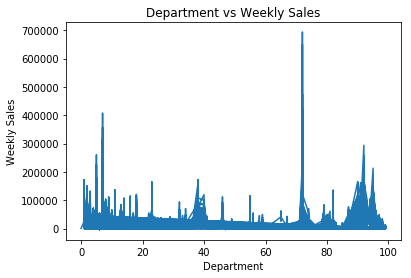

In [54]:
import matplotlib.pyplot as plt
x=df_fill['Dept']
y=df_fill['Weekly_Sales']
plt.title("Department vs Weekly Sales")
plt.xlabel("Department")
plt.ylabel("Weekly Sales")
plt.plot(x,y)
plt.show()

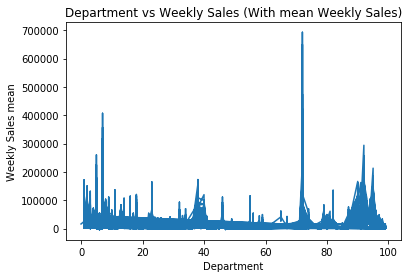

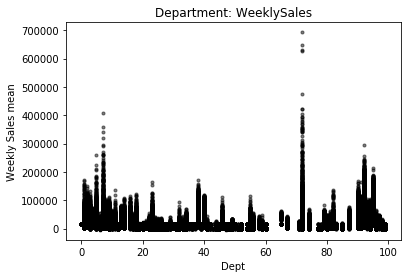

In [55]:
import matplotlib.pyplot as plt
x=df_fill['Dept']
y=df_fill['Weekly_Sales_mean']
plt.title("Department vs Weekly Sales (With mean Weekly Sales)")
plt.xlabel("Department")
plt.ylabel("Weekly Sales mean")
plt.plot(x,y)
plt.show()

x= df_fill['Dept'].values
y= df_fill['Weekly_Sales_mean'].values
colors = (0,0,0)
area= np.pi*3
plt.scatter(x,y,s=area,c=colors,alpha=0.5)
plt.title("Department: WeeklySales")
plt.xlabel('Dept')
plt.ylabel('Weekly Sales mean')
plt.show()

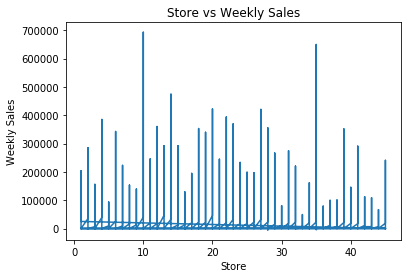

In [56]:
import matplotlib.pyplot as plt
x=df_fill['Store']
y=df_fill['Weekly_Sales']
plt.title("Store vs Weekly Sales")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.plot(x,y)
plt.show()

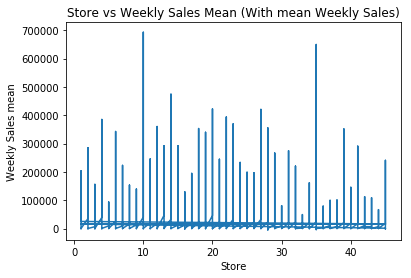

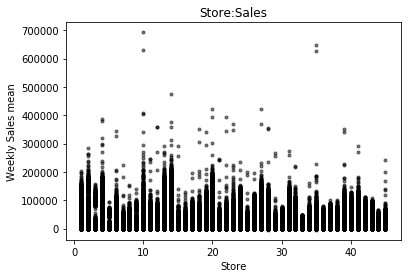

In [57]:
import matplotlib.pyplot as plt
x=df_fill['Store']
y=df_fill['Weekly_Sales_mean']
plt.title("Store vs Weekly Sales Mean (With mean Weekly Sales)")
plt.xlabel("Store")
plt.ylabel("Weekly Sales mean")
plt.plot(x,y)
plt.show()


x= df_fill['Store'].values
y= df_fill['Weekly_Sales_mean'].values
colors = (0,0,0)
area= np.pi*3
plt.scatter(x,y,s=area,c=colors,alpha=0.5)
plt.title("Store:Sales")
plt.xlabel('Store')
plt.ylabel('Weekly Sales mean')
plt.show()

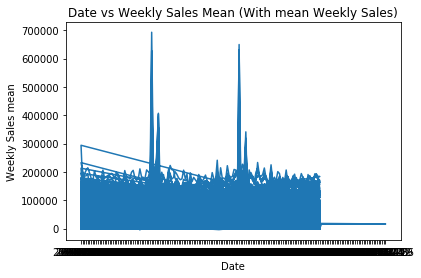

In [58]:
import matplotlib.pyplot as plt
x=df_fill['Date']
y=df_fill['Weekly_Sales_mean']
plt.title("Date vs Weekly Sales Mean (With mean Weekly Sales)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales mean")
plt.plot(x,y)
plt.show()

In [59]:
# df_fill['IsHoliday0_1']=2
# for index, row in df_fill.iterrows():
#    if row['IsHoliday'] is False :
#      row['IsHoliday0_1']=0
#    else:
#      row['IsHoliday0_1']=1

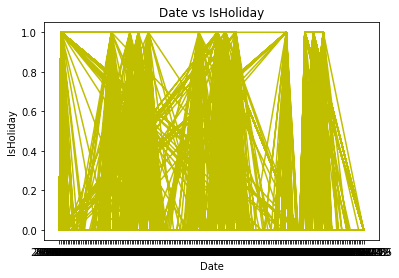

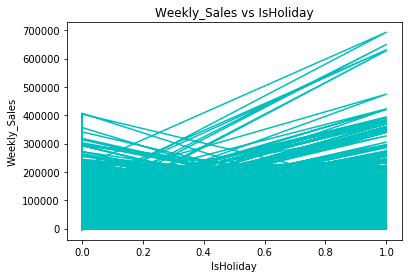

In [60]:
import matplotlib.pyplot as plt
x=df_fill['Date']
y1=df_fill['IsHoliday']
plt.title("Date vs IsHoliday")
plt.xlabel("Date")
plt.ylabel("IsHoliday")
plt.plot(x,y1,c='y')
plt.show()

x=df_fill['IsHoliday']
y2=df_fill["Weekly_Sales_mean"]
plt.title("Weekly_Sales vs IsHoliday")
plt.xlabel("IsHoliday")
plt.ylabel("Weekly_Sales")
plt.plot(x,y2,c="c")
plt.show()

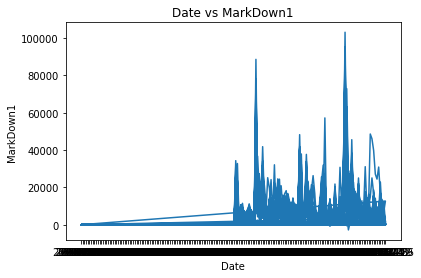

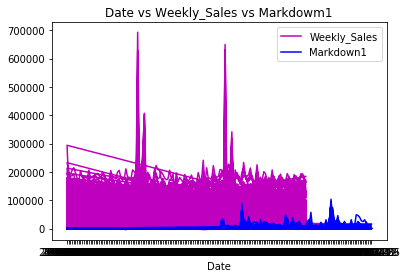

In [61]:
import matplotlib.pyplot as plt
y1=df_fill['MarkDown1']
x=df_fill['Date']
plt.title("Date vs MarkDown1")
plt.xlabel("Date")
plt.ylabel("MarkDown1")
plt.plot(x,y1)
plt.show()

import matplotlib.pyplot as plt
y1=df_fill['MarkDown1']
y2=df_fill['Weekly_Sales_mean']
x=df_fill['Date']
plt.plot(x,y2,c='m',label='Weekly_Sales')
plt.plot(x,y1,c='b',label='Markdown1')
plt.title("Date vs Weekly_Sales vs Markdowm1")
plt.xlabel("Date")
plt.legend()
plt.show()



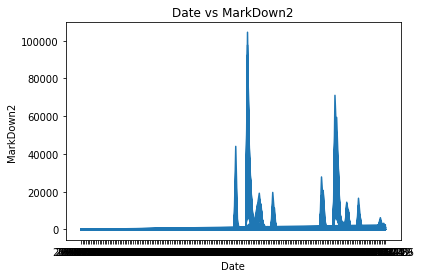

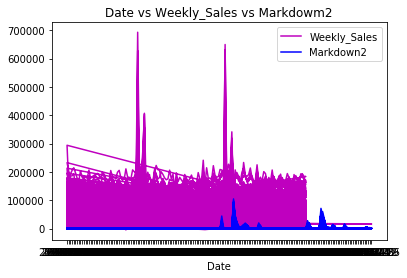

In [62]:
import matplotlib.pyplot as plt
y1=df_fill['MarkDown2']
x=df_fill['Date']
plt.title("Date vs MarkDown2")
plt.xlabel("Date")
plt.ylabel("MarkDown2")
plt.plot(x,y1)
plt.show()

import matplotlib.pyplot as plt
y1=df_fill['MarkDown2']
y2=df_fill['Weekly_Sales_mean']
x=df_fill['Date']
plt.plot(x,y2,c='m',label='Weekly_Sales')
plt.plot(x,y1,c='b',label='Markdown2')
plt.title("Date vs Weekly_Sales vs Markdowm2")
plt.xlabel("Date")
plt.legend()
plt.show()


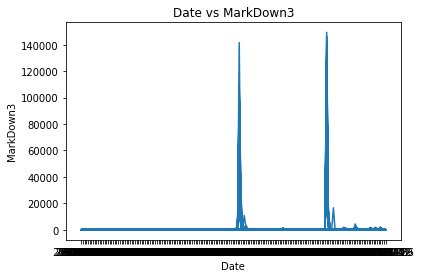

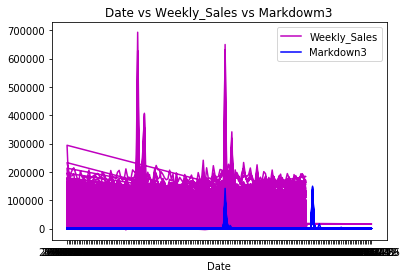

In [63]:
import matplotlib.pyplot as plt
y1=df_fill['MarkDown3']
x=df_fill['Date']
plt.title("Date vs MarkDown3")
plt.xlabel("Date")
plt.ylabel("MarkDown3")
plt.plot(x,y1)
plt.show()

import matplotlib.pyplot as plt
y1=df_fill['MarkDown3']
y2=df_fill['Weekly_Sales_mean']
x=df_fill['Date']
plt.plot(x,y2,c='m',label='Weekly_Sales')
plt.plot(x,y1,c='b',label='Markdown3')
plt.title("Date vs Weekly_Sales vs Markdowm3")
plt.xlabel("Date")
plt.legend()
plt.show()


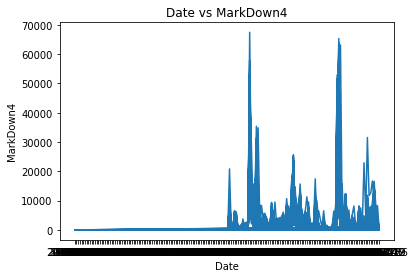

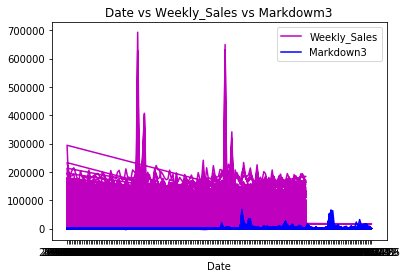

In [64]:
import matplotlib.pyplot as plt
y1=df_fill['MarkDown4']
x=df_fill['Date']
plt.title("Date vs MarkDown4")
plt.xlabel("Date")
plt.ylabel("MarkDown4")
plt.plot(x,y1)
plt.show()

import matplotlib.pyplot as plt
y1=df_fill['MarkDown4']
y2=df_fill['Weekly_Sales_mean']
x=df_fill['Date']
plt.plot(x,y2,c='m',label='Weekly_Sales')
plt.plot(x,y1,c='b',label='Markdown3')
plt.title("Date vs Weekly_Sales vs Markdowm3")
plt.xlabel("Date")
plt.legend()
plt.show()


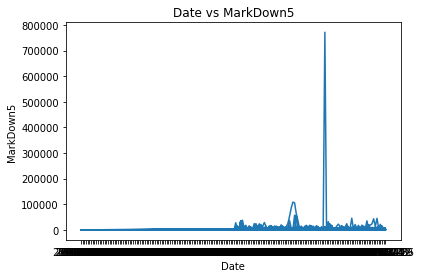

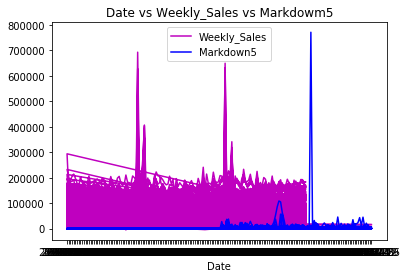

In [65]:
import matplotlib.pyplot as plt
y1=df_fill['MarkDown5']
x=df_fill['Date']
plt.title("Date vs MarkDown5")
plt.xlabel("Date")
plt.ylabel("MarkDown5")
plt.plot(x,y1)
plt.show()

import matplotlib.pyplot as plt
y1=df_fill['MarkDown5']
y2=df_fill['Weekly_Sales_mean']
x=df_fill['Date']
plt.plot(x,y2,c='m',label='Weekly_Sales')
plt.plot(x,y1,c='b',label='Markdown5')
plt.title("Date vs Weekly_Sales vs Markdowm5")
plt.xlabel("Date")
plt.legend()
plt.show()


In [66]:
##Markdown 1,2,4,5 doesnot seem to be as effective as markdown 3.

In [67]:
#We will do a bit of very basic feature engineering here by creating a feature which 
# indicates whether a certain markdown was active at all.
#We probably safely filled all missing values in case of markdown wth zero. For the markdowns this means that there was no markdown.

In [68]:
df_fill.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Split,Store,Temperature,Unemployment,Weekly_Sales,Weekly_Sales_mean,Temperature_mean,Unemployment_mean
0,211.096358,2010-02-05,0.0,2.572,False,0.0,0.0,0.0,0.0,0.0,0,1,42.31,8.106,0.0,15981.258123,42.31,8.106
1,211.242170,2010-02-12,0.0,2.548,True,0.0,0.0,0.0,0.0,0.0,0,1,38.51,8.106,0.0,15981.258123,38.51,8.106
2,211.289143,2010-02-19,0.0,2.514,False,0.0,0.0,0.0,0.0,0.0,0,1,39.93,8.106,0.0,15981.258123,39.93,8.106
3,211.319643,2010-02-26,0.0,2.561,False,0.0,0.0,0.0,0.0,0.0,0,1,46.63,8.106,0.0,15981.258123,46.63,8.106
4,211.350143,2010-03-05,0.0,2.625,False,0.0,0.0,0.0,0.0,0.0,0,1,46.50,8.106,0.0,15981.258123,46.50,8.106


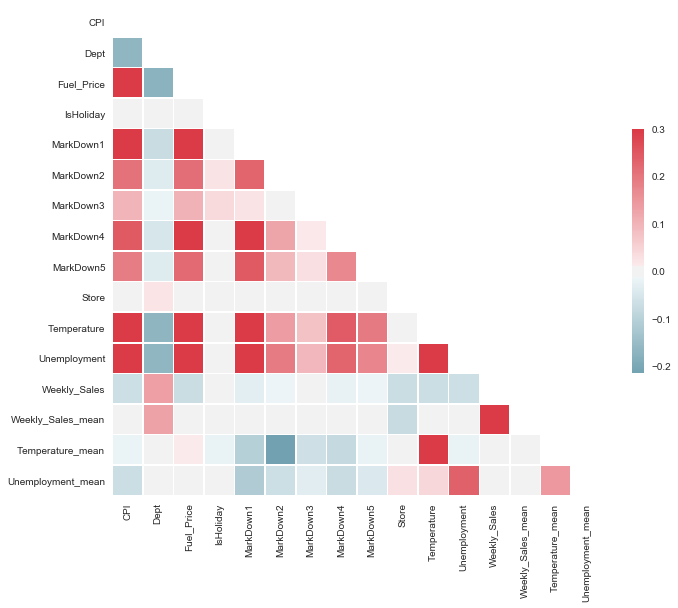

In [69]:
# Code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# we find any obvious relations between our variables to get a feeling for the data. We begin with a correlation matrix.
sns.set(style="white")

# Compute the correlation matrix
corr = df_fill.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [70]:
# Most of what we see in the correlation table is of little surprise. 
# Discounts are correlated and higher unemployment means lower Consumer Price Index. 
# More interestingly, it appears that higher department numbers have higher sales. 
# Maybe because they are newer? Also, larger stores generate more sales, discounts generally generate higher sales values
# and larger unemployment result in a bit fewer sales. 
# Unfortunately, there appears to be little relationship between holidays, temperatures or fuelprices with our weekly sales.

In [71]:
# Although no further relationships appear evident from this analysis, 
# there appears to be some outliers in our data. Let's take a bit of a closer look at these.

In [72]:
df_fill.loc[df_fill['Weekly_Sales_mean'] >300000]

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Split,Store,Temperature,Unemployment,Weekly_Sales,Weekly_Sales_mean,Temperature_mean,Unemployment_mean
30474,0.0,2011-12-23,7.0,0.0,False,0.0,0.0,0.0,0.0,0.0,Train,4,0.0,0.0,318422.01,318422.01,59.356198,7.826821
37201,0.0,2010-11-26,72.0,0.0,True,0.0,0.0,0.0,0.0,0.0,Train,4,0.0,0.0,381072.11,381072.11,59.356198,7.826821
37253,0.0,2011-11-25,72.0,0.0,True,0.0,0.0,0.0,0.0,0.0,Train,4,0.0,0.0,385051.04,385051.04,59.356198,7.826821
56417,0.0,2010-11-26,72.0,0.0,True,0.0,0.0,0.0,0.0,0.0,Train,6,0.0,0.0,342578.65,342578.65,59.356198,7.826821
56469,0.0,2011-11-25,72.0,0.0,True,0.0,0.0,0.0,0.0,0.0,Train,6,0.0,0.0,326866.60,326866.60,59.356198,7.826821
88428,0.0,2010-12-24,7.0,0.0,False,0.0,0.0,0.0,0.0,0.0,Train,10,0.0,0.0,406988.63,406988.63,59.356198,7.826821
88480,0.0,2011-12-23,7.0,0.0,False,0.0,0.0,0.0,0.0,0.0,Train,10,0.0,0.0,341308.00,341308.00,59.356198,7.826821
95373,0.0,2010-11-26,72.0,0.0,True,0.0,0.0,0.0,0.0,0.0,Train,10,0.0,0.0,693099.36,693099.36,59.356198,7.826821
95377,0.0,2010-12-24,72.0,0.0,False,0.0,0.0,0.0,0.0,0.0,Train,10,0.0,0.0,404245.03,404245.03,59.356198,7.826821
95425,0.0,2011-11-25,72.0,0.0,True,0.0,0.0,0.0,0.0,0.0,Train,10,0.0,0.0,630999.19,630999.19,59.356198,7.826821


In [73]:
#It appears to be quite obvious. The end of November sees a lot of exceptionally large sales. 
# This special day, better known as Black friday, causes sales to be on fire, and
# undoubtedly a dummy variable should be created for this day. 
# Also, Christmas, appears here and there. Since it is not considered holiday, we will also make a dummy for this day. 
# Let's see if we should consider some other special days as well.

In [74]:
df_fill.loc[df_fill['Weekly_Sales_mean'] >240000,"Date"].value_counts()

2010-11-26    23
2011-11-25    22
2010-12-24    14
2011-12-23     9
2010-12-17     2
2010-02-05     1
2011-08-26     1
Name: Date, dtype: int64

In [75]:
#Except for a handful spurious other dates, it appears that the two days before Christmas and Black Friday will do the job.

In [76]:
#Now we have to create some dummy variables for categorical data.

In [ ]:
df_fill = df_fill.assign(md1_present = df_fill.MarkDown1.notnull())
df_fill = df_fill.assign(md2_present = df_fill.MarkDown2.notnull())
df_fill = df_fill.assign(md3_present = df_fill.MarkDown3.notnull())
df_fill = df_fill.assign(md4_present = df_fill.MarkDown4.notnull())
df_fill = df_fill.assign(md5_present = df_fill.MarkDown5.notnull())

In [77]:
df_fill['Store'] = 'Store_' + df_fill['Store'].map(str)
df_fill['Dept'] = 'Dept_' + df_fill['Dept'].map(str)
df_fill['IsHoliday'] = 'IsHoliday_' + df_fill['IsHoliday'].map(str)

In [78]:
# Create dummies
store_dummies = pd.get_dummies(df_fill['Store'])
dept_dummies = pd.get_dummies(df_fill['Dept'])
holiday_dummies = pd.get_dummies(df_fill['IsHoliday'])

In [79]:
#Dummy variables: Dates
#From our earlier analysis, it has turned out that the date may be our best friend. As a general rule, it is a good start to already distinguish between different months in our model.
# This will create 12 dummy variables; one for each month.

In [80]:
df_fill['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df_fill['Date'].astype(str).values.tolist()]
df_fill['Month'] = [date.month for date in df_fill['DateType']]
df_fill['Month'] = 'Month_' + df_fill['Month'].map(str)
Month_dummies = pd.get_dummies(df_fill['Month'] )

In [81]:
#Next, let's look at 'special dates'. One variable for Christmas, one for black friday. 
#We have to manually look up the dates of black friday if we want to extrapolate our data to other years, but for now we know: 26 - 11 - 2010 and 25 - 11 - 2011.

In [82]:
df_fill['Black_Friday'] = np.where((df_fill['DateType']==datetime(2010, 11, 26).date()) | (df_fill['DateType']==datetime(2011, 11, 25).date()), 'yes', 'no')
df_fill['Pre_christmas'] = np.where((df_fill['DateType']==datetime(2010, 12, 23).date()) | (df_fill['DateType']==datetime(2010, 12, 24).date()) | (df_fill['DateType']==datetime(2011, 12, 23).date()) | (df_fill['DateType']==datetime(2011, 12, 24).date()), 'yes', 'no')
df_fill['Black_Friday'] = 'Black_Friday_' + df_fill['Black_Friday'].map(str)
df_fill['Pre_christmas'] = 'Pre_christmas_' + df_fill['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(df_fill['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(df_fill['Pre_christmas'] )

In [83]:
df_fill['Month_Year'] = [date.month for date in df_fill['DateType']]
df_fill['Month_Year'] = df_fill['Month_Year'].map(str)
Month_dummies = pd.get_dummies(df_fill['Month_Year'] )

In [84]:
df_fill.head(2345)

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,Weekly_Sales,Weekly_Sales_mean,Temperature_mean,Unemployment_mean,DateType,Month,Black_Friday,Pre_christmas,Month_Year
0,211.096358,2010-02-05,Dept_0.0,2.572,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,8.106,0.0,15981.258123,42.31,8.106,2010-02-05,Month_2,Black_Friday_no,Pre_christmas_no,2
1,211.242170,2010-02-12,Dept_0.0,2.548,IsHoliday_True,0.00,0.00,0.00,0.00,0.00,...,8.106,0.0,15981.258123,38.51,8.106,2010-02-12,Month_2,Black_Friday_no,Pre_christmas_no,2
2,211.289143,2010-02-19,Dept_0.0,2.514,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,8.106,0.0,15981.258123,39.93,8.106,2010-02-19,Month_2,Black_Friday_no,Pre_christmas_no,2
3,211.319643,2010-02-26,Dept_0.0,2.561,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,8.106,0.0,15981.258123,46.63,8.106,2010-02-26,Month_2,Black_Friday_no,Pre_christmas_no,2
4,211.350143,2010-03-05,Dept_0.0,2.625,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,8.106,0.0,15981.258123,46.50,8.106,2010-03-05,Month_3,Black_Friday_no,Pre_christmas_no,3
5,211.380643,2010-03-12,Dept_0.0,2.667,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,8.106,0.0,15981.258123,57.79,8.106,2010-03-12,Month_3,Black_Friday_no,Pre_christmas_no,3
6,211.215635,2010-03-19,Dept_0.0,2.720,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,8.106,0.0,15981.258123,54.58,8.106,2010-03-19,Month_3,Black_Friday_no,Pre_christmas_no,3
7,211.018042,2010-03-26,Dept_0.0,2.732,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,8.106,0.0,15981.258123,51.45,8.106,2010-03-26,Month_3,Black_Friday_no,Pre_christmas_no,3
8,210.820450,2010-04-02,Dept_0.0,2.719,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,7.808,0.0,15981.258123,62.27,7.808,2010-04-02,Month_4,Black_Friday_no,Pre_christmas_no,4
9,210.622857,2010-04-09,Dept_0.0,2.770,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,7.808,0.0,15981.258123,65.86,7.808,2010-04-09,Month_4,Black_Friday_no,Pre_christmas_no,4


In [85]:
# Add dummies
# We will actually skip some of these
#df = pd.concat([df,type_dummies,store_dummies,dept_dummies,holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies,Month_dummies],axis=1)

df_fill = pd.concat([df_fill,holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies],axis=1)

In [86]:
#We will take the store median in the available data as one of its properties
# Get dataframe with averages per store and department
medians = pd.DataFrame({'Median Sales' :df_fill.loc[df_fill['Split']=='Train'].groupby(by=['Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()}).reset_index()
medians.head(10)

,Dept,Store,Month,IsHoliday,Median Sales
0,Dept_1.0,Store_1,Month_1,IsHoliday_False,17350.585
1,Dept_1.0,Store_1,Month_10,IsHoliday_False,23388.030
2,Dept_1.0,Store_1,Month_11,IsHoliday_False,19551.115
3,Dept_1.0,Store_1,Month_11,IsHoliday_True,19865.770
4,Dept_1.0,Store_1,Month_12,IsHoliday_False,39109.390
5,Dept_1.0,Store_1,Month_12,IsHoliday_True,21237.730
6,Dept_1.0,Store_1,Month_2,IsHoliday_False,23510.490
7,Dept_1.0,Store_1,Month_2,IsHoliday_True,37887.170
8,Dept_1.0,Store_1,Month_3,IsHoliday_False,21280.400
9,Dept_1.0,Store_1,Month_4,IsHoliday_False,26318.080


In [87]:
# Merge by type, store, department and month
df_fill = df_fill.merge(medians, how = 'outer', on = ['Dept','Store','Month','IsHoliday'])

In [88]:
df_fill.head(2350)

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday,Pre_christmas,Month_Year,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales
0,211.096358,2010-02-05,Dept_0.0,2.572,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,NaN
1,211.289143,2010-02-19,Dept_0.0,2.514,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,NaN
2,211.319643,2010-02-26,Dept_0.0,2.561,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,NaN
3,212.566881,2011-02-04,Dept_0.0,2.989,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,NaN
4,213.247885,2011-02-18,Dept_0.0,3.045,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,NaN
5,213.535609,2011-02-25,Dept_0.0,3.065,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,NaN
6,220.172015,2012-02-03,Dept_0.0,3.360,IsHoliday_False,34577.06,3579.21,160.53,32403.87,5630.40,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,NaN
7,220.425759,2012-02-17,Dept_0.0,3.510,IsHoliday_False,9873.33,11062.27,9.80,8409.31,3402.66,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,NaN
8,220.636902,2012-02-24,Dept_0.0,3.555,IsHoliday_False,9349.61,7556.01,3.20,1219.92,8143.59,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,NaN
9,224.235290,2013-02-01,Dept_0.0,3.244,IsHoliday_False,9290.91,1359.90,265.00,20657.82,972.61,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,NaN


In [89]:
# Fill NA
df_fill['Median Sales'].fillna(df_fill['Median Sales'].loc[df_fill['Split']=='Train'].median(), inplace=True) 

In [90]:
df_fill.head(234345)

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Black_Friday,Pre_christmas,Month_Year,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales
0,211.096358,2010-02-05,Dept_0.0,2.572,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,7563.040
1,211.289143,2010-02-19,Dept_0.0,2.514,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,7563.040
2,211.319643,2010-02-26,Dept_0.0,2.561,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,7563.040
3,212.566881,2011-02-04,Dept_0.0,2.989,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,7563.040
4,213.247885,2011-02-18,Dept_0.0,3.045,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,7563.040
5,213.535609,2011-02-25,Dept_0.0,3.065,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,7563.040
6,220.172015,2012-02-03,Dept_0.0,3.360,IsHoliday_False,34577.06,3579.21,160.53,32403.87,5630.40,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,7563.040
7,220.425759,2012-02-17,Dept_0.0,3.510,IsHoliday_False,9873.33,11062.27,9.80,8409.31,3402.66,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,7563.040
8,220.636902,2012-02-24,Dept_0.0,3.555,IsHoliday_False,9349.61,7556.01,3.20,1219.92,8143.59,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,7563.040
9,224.235290,2013-02-01,Dept_0.0,3.244,IsHoliday_False,9290.91,1359.90,265.00,20657.82,972.61,...,Black_Friday_no,Pre_christmas_no,2,1,0,1,0,1,0,7563.040


In [91]:
list(df_fill)

['CPI',
 'Date',
 'Dept',
 'Fuel_Price',
 'IsHoliday',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'Split',
 'Store',
 'Temperature',
 'Unemployment',
 'Weekly_Sales',
 'Weekly_Sales_mean',
 'Temperature_mean',
 'Unemployment_mean',
 'DateType',
 'Month',
 'Black_Friday',
 'Pre_christmas',
 'Month_Year',
 'IsHoliday_False',
 'IsHoliday_True',
 'Pre_christmas_no',
 'Pre_christmas_yes',
 'Black_Friday_no',
 'Black_Friday_yes',
 'Median Sales']

In [92]:
# Create a key for easy access

df_fill['Key'] = df_fill['Dept'].map(str)+df_fill['Store'].map(str)+df_fill['Date'].map(str)+df_fill['IsHoliday'].map(str)

In [93]:
df_fill.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_christmas,Month_Year,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key
0,211.096358,2010-02-05,Dept_0.0,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,2,1,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-05IsHoliday_False
1,211.289143,2010-02-19,Dept_0.0,2.514,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,2,1,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-19IsHoliday_False
2,211.319643,2010-02-26,Dept_0.0,2.561,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,2,1,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-26IsHoliday_False
3,212.566881,2011-02-04,Dept_0.0,2.989,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,2,1,0,1,0,1,0,7563.04,Dept_0.0Store_12011-02-04IsHoliday_False
4,213.247885,2011-02-18,Dept_0.0,3.045,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,Pre_christmas_no,2,1,0,1,0,1,0,7563.04,Dept_0.0Store_12011-02-18IsHoliday_False


In [94]:
#Lagged Variables
#We will take a lagged variable of our store's previous weeks sales. 
#To do so, we will first add a column with a one week lagged date, sort the data, and 
#then match the lagged sales with the initial dataframe using the department and store number.


In [95]:
# Attach variable of last weeks time
df_fill['DateLagged'] = df_fill['DateType']- timedelta(days=7)
df_fill.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Month_Year,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged
0,211.096358,2010-02-05,Dept_0.0,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2,1,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-05IsHoliday_False,2010-01-29
1,211.289143,2010-02-19,Dept_0.0,2.514,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2,1,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-19IsHoliday_False,2010-02-12
2,211.319643,2010-02-26,Dept_0.0,2.561,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2,1,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-26IsHoliday_False,2010-02-19
3,212.566881,2011-02-04,Dept_0.0,2.989,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2,1,0,1,0,1,0,7563.04,Dept_0.0Store_12011-02-04IsHoliday_False,2011-01-28
4,213.247885,2011-02-18,Dept_0.0,3.045,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2,1,0,1,0,1,0,7563.04,Dept_0.0Store_12011-02-18IsHoliday_False,2011-02-11


In [96]:
#Next, we create a sorted dataframe.
# Make a sorted dataframe. This will allow us to find lagged variables much faster!
sorted_df = df_fill.sort_values(['Store', 'Dept','DateType'], ascending=[1, 1,1])
sorted_df = sorted_df.reset_index(drop=True) # Reinitialize the row indices for the loop to work

In [111]:
sorted_df

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable
0,211.096358,2010-02-05,Dept_0.0,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-05IsHoliday_False,2010-01-29,7563.04,0.0
1,211.242170,2010-02-12,Dept_0.0,2.548,IsHoliday_True,0.0,0.0,0.0,0.0,0.0,...,1,1,0,1,0,7563.04,Dept_0.0Store_12010-02-12IsHoliday_True,2010-02-05,7563.04,0.0
2,211.289143,2010-02-19,Dept_0.0,2.514,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-19IsHoliday_False,2010-02-12,7563.04,0.0
3,211.319643,2010-02-26,Dept_0.0,2.561,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-26IsHoliday_False,2010-02-19,7563.04,0.0
4,211.350143,2010-03-05,Dept_0.0,2.625,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-03-05IsHoliday_False,2010-02-26,7563.04,0.0
5,211.380643,2010-03-12,Dept_0.0,2.667,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-03-12IsHoliday_False,2010-03-05,7563.04,0.0
6,211.215635,2010-03-19,Dept_0.0,2.720,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-03-19IsHoliday_False,2010-03-12,7563.04,0.0
7,211.018042,2010-03-26,Dept_0.0,2.732,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-03-26IsHoliday_False,2010-03-19,7563.04,0.0
8,210.820450,2010-04-02,Dept_0.0,2.719,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-04-02IsHoliday_False,2010-03-26,7563.04,0.0
9,210.622857,2010-04-09,Dept_0.0,2.770,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-04-09IsHoliday_False,2010-04-02,7563.04,0.0


In [98]:
sorted_df['LaggedSales'] = np.nan # Initialize column
sorted_df['LaggedAvailable'] = np.nan # Initialize column
last=df_fill.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_df.shape[0]
for index, row in sorted_df.iterrows():
    lag_date = row["DateLagged"]
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    if((last['DateType']== lag_date) & (last['Weekly_Sales']>0)): 
        sorted_df.set_value(index, 'LaggedSales',last['Weekly_Sales'])
        sorted_df.set_value(index, 'LaggedAvailable',1)
    else:
        sorted_df.set_value(index, 'LaggedSales',row['Median Sales']) # Fill with median
        sorted_df.set_value(index, 'LaggedAvailable',0)

    last = row #Remember last row for speed
    if(index%int(row_len/10)==0): #See progress by printing every 10% interval
        print(str(int(index*100/row_len))+'% loaded')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


0% loaded
9% loaded
19% loaded
29% loaded
39% loaded
49% loaded
59% loaded
69% loaded
79% loaded
89% loaded
99% loaded


In [100]:
# Merge by store and department
df_fill = df_fill.merge(sorted_df[['Dept', 'Store','DateType','LaggedSales','LaggedAvailable']], how = 'inner', on = ['Dept', 'Store','DateType'])
df_fill.head(25)

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable
0,211.096358,2010-02-05,Dept_0.0,2.572,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-05IsHoliday_False,2010-01-29,7563.04,0.0
1,211.289143,2010-02-19,Dept_0.0,2.514,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-19IsHoliday_False,2010-02-12,7563.04,0.0
2,211.319643,2010-02-26,Dept_0.0,2.561,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,0,1,0,1,0,7563.04,Dept_0.0Store_12010-02-26IsHoliday_False,2010-02-19,7563.04,0.0
3,212.566881,2011-02-04,Dept_0.0,2.989,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,0,1,0,1,0,7563.04,Dept_0.0Store_12011-02-04IsHoliday_False,2011-01-28,7563.04,0.0
4,213.247885,2011-02-18,Dept_0.0,3.045,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,0,1,0,1,0,7563.04,Dept_0.0Store_12011-02-18IsHoliday_False,2011-02-11,7563.04,0.0
5,213.535609,2011-02-25,Dept_0.0,3.065,IsHoliday_False,0.00,0.00,0.00,0.00,0.00,...,0,1,0,1,0,7563.04,Dept_0.0Store_12011-02-25IsHoliday_False,2011-02-18,7563.04,0.0
6,220.172015,2012-02-03,Dept_0.0,3.360,IsHoliday_False,34577.06,3579.21,160.53,32403.87,5630.40,...,0,1,0,1,0,7563.04,Dept_0.0Store_12012-02-03IsHoliday_False,2012-01-27,7563.04,0.0
7,220.425759,2012-02-17,Dept_0.0,3.510,IsHoliday_False,9873.33,11062.27,9.80,8409.31,3402.66,...,0,1,0,1,0,7563.04,Dept_0.0Store_12012-02-17IsHoliday_False,2012-02-10,7563.04,0.0
8,220.636902,2012-02-24,Dept_0.0,3.555,IsHoliday_False,9349.61,7556.01,3.20,1219.92,8143.59,...,0,1,0,1,0,7563.04,Dept_0.0Store_12012-02-24IsHoliday_False,2012-02-17,7563.04,0.0
9,224.235290,2013-02-01,Dept_0.0,3.244,IsHoliday_False,9290.91,1359.90,265.00,20657.82,972.61,...,0,1,0,1,0,7563.04,Dept_0.0Store_12013-02-01IsHoliday_False,2013-01-25,7563.04,0.0


In [102]:
df_fill['Sales_dif'] = df_fill['Median Sales'] - df_fill['LaggedSales']
df_fill[['Dept', 'Store','DateType','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,DateType,LaggedSales,Weekly_Sales,Median Sales
0,Dept_0.0,Store_1,2010-02-05,7563.04,0.0,7563.04
1,Dept_0.0,Store_1,2010-02-19,7563.04,0.0,7563.04
2,Dept_0.0,Store_1,2010-02-26,7563.04,0.0,7563.04
3,Dept_0.0,Store_1,2011-02-04,7563.04,0.0,7563.04
4,Dept_0.0,Store_1,2011-02-18,7563.04,0.0,7563.04


In [103]:
#Remove redundant items
#We will take the store average in the available data as one of its properties

In [104]:
switch= 1

if(switch):
    df_backup = df_fill
else:
    df_fill=df_backup
    display(df_backup.head())

In [105]:
#Now, let's change the variable to be forecasted to the difference from the median. Afterward, we can drop the weekly sales

In [106]:
df_fill['Difference'] = df_fill['Median Sales'] - df_fill['Weekly_Sales']
df_fill.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,211.096358,2010-02-05,Dept_0.0,2.572,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,7563.04,Dept_0.0Store_12010-02-05IsHoliday_False,2010-01-29,7563.04,0.0,0.0,7563.04
1,211.289143,2010-02-19,Dept_0.0,2.514,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,7563.04,Dept_0.0Store_12010-02-19IsHoliday_False,2010-02-12,7563.04,0.0,0.0,7563.04
2,211.319643,2010-02-26,Dept_0.0,2.561,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,7563.04,Dept_0.0Store_12010-02-26IsHoliday_False,2010-02-19,7563.04,0.0,0.0,7563.04
3,212.566881,2011-02-04,Dept_0.0,2.989,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,7563.04,Dept_0.0Store_12011-02-04IsHoliday_False,2011-01-28,7563.04,0.0,0.0,7563.04
4,213.247885,2011-02-18,Dept_0.0,3.045,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0,1,0,7563.04,Dept_0.0Store_12011-02-18IsHoliday_False,2011-02-11,7563.04,0.0,0.0,7563.04


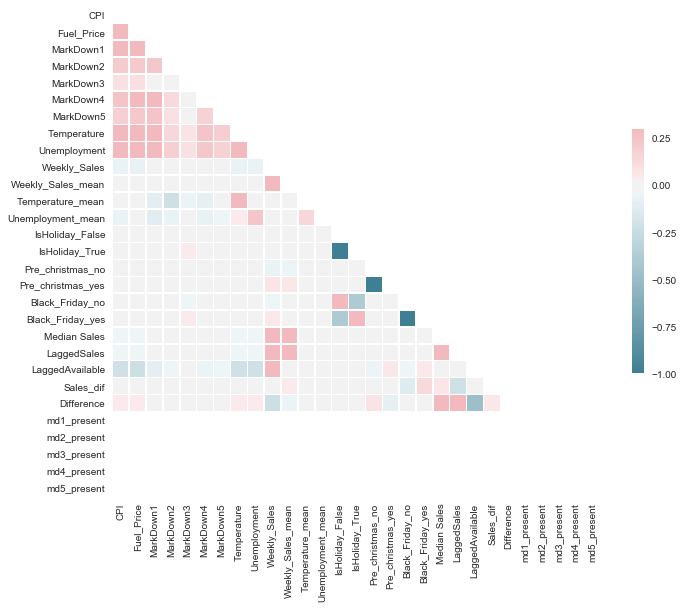

In [115]:
# Code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Compute the correlation matrix
corr = df_fill.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [108]:
#Select variables to include in model
#In this section, we can change the variables we ultimately want to include in our model training.

In [116]:
selector = [
    #'Month',
    'CPI',
    'Fuel_Price',
    'MarkDown1',
    'MarkDown2',
    'MarkDown3',
    'MarkDown4',
    'MarkDown5',
    'Temperature',
    'Unemployment',  
    'md1_present',
    'md2_present',
    'md3_present',
    'md4_present',
    'md5_present',
    'IsHoliday_False',
    'IsHoliday_True',
    'Pre_christmas_no',
    'Pre_christmas_yes',
    'Black_Friday_no',
    'Black_Friday_yes',    
    'LaggedSales',
    'Sales_dif',
    'LaggedAvailable'
    ]
display(df_fill[selector].describe())
display(df_fill[selector].head())

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Temperature,Unemployment,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
count,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000
mean,2.407318,0.051200,52.043454,18.143804,11.672103,20.936541,30.717216,0.892265,0.109252,0.928098,0.071902,0.988853,0.011147,0.988897,0.011103,15843.366134,-192.425280,0.761785
std,20.770490,0.417807,999.040140,689.572588,929.208371,601.458362,1182.693075,7.576901,0.944640,0.258326,0.258326,0.104988,0.104988,0.104783,0.104783,22541.433348,5958.303444,0.425991
min,0.000000,0.000000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,-7.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1750.000000,-540263.085000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2165.620000,-285.851250,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,7563.040000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,19886.125000,264.475000,1.000000
max,228.976456,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,101.950000,14.313000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,693099.360000,579251.325000,1.000000


,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Temperature,Unemployment,md1_present,...,md5_present,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
0,211.096358,2.572,0.0,0.0,0.0,0.0,0.0,42.31,8.106,True,...,True,1,0,1,0,1,0,7563.04,0.0,0.0
1,211.289143,2.514,0.0,0.0,0.0,0.0,0.0,39.93,8.106,True,...,True,1,0,1,0,1,0,7563.04,0.0,0.0
2,211.319643,2.561,0.0,0.0,0.0,0.0,0.0,46.63,8.106,True,...,True,1,0,1,0,1,0,7563.04,0.0,0.0
3,212.566881,2.989,0.0,0.0,0.0,0.0,0.0,42.27,7.742,True,...,True,1,0,1,0,1,0,7563.04,0.0,0.0
4,213.247885,3.045,0.0,0.0,0.0,0.0,0.0,57.36,7.742,True,...,True,1,0,1,0,1,0,7563.04,0.0,0.0


In [117]:
#Split data into training and test sets
#Now we can split train test again and of course remove the trivial weekly sales data from the test set.

In [122]:
train = df_fill.loc[df_fill['Split']=='Train']
test = df_fill.loc[df_fill['Split']=='Test']
test.head(23450)

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,md1_present,md2_present,md3_present,md4_present,md5_present
8199,0.0,2013-02-01,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2013-01-25,23510.490,0.0,0.000,23510.490,True,True,True,True,True
8200,0.0,2013-02-15,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2013-02-08,23510.490,0.0,0.000,23510.490,True,True,True,True,True
8201,0.0,2013-02-22,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2013-02-15,23510.490,0.0,0.000,23510.490,True,True,True,True,True
8205,0.0,2013-02-08,Dept_1.0,0.0,IsHoliday_True,0.0,0.0,0.0,0.0,0.0,...,2013-02-01,37887.170,0.0,0.000,37887.170,True,True,True,True,True
8219,0.0,2013-03-01,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2013-02-22,21280.400,0.0,0.000,21280.400,True,True,True,True,True
8220,0.0,2013-03-08,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2013-03-01,21280.400,0.0,0.000,21280.400,True,True,True,True,True
8221,0.0,2013-03-15,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2013-03-08,21280.400,0.0,0.000,21280.400,True,True,True,True,True
8222,0.0,2013-03-22,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2013-03-15,21280.400,0.0,0.000,21280.400,True,True,True,True,True
8223,0.0,2013-03-29,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2013-03-22,21280.400,0.0,0.000,21280.400,True,True,True,True,True
8238,0.0,2013-04-05,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,2013-03-29,26318.080,0.0,0.000,26318.080,True,True,True,True,True


In [123]:
#Test - dev
# Usually, model performance can be evaluated on the out-of-sample test set. 
#However, since that data is not available, it may be wise to split our training set one more time in order to be 
#able to test out of sample performance. Let's give up 20% of our training set for this sanity check development set.

In [124]:
# Set seed for reproducability 
np.random.seed(42)
X_train, X_dev, y_train, y_dev = train_test_split(train[selector], train['Difference'], test_size=0.2, random_state=42)
print(X_dev.shape)
print(y_dev.shape)

(84314, 23)
(84314,)


In [125]:
# Model selection

In [126]:
#Adam optimizer with regularization
#In our next model, we will stick with the relu activator, but replace the momentum with an Adam optimizer. 
#Adaptive momumtum estimator uses exponentially weighted averages of the gradients to optimize its momentum. 
#However, since this method is known to overfit the model because of its fast decent, we will make use of a regulizer 
#to avoid overfitting. The l2 regulizer adds the sum of absolute values of the weights to the loss function, thus 
#discouraging large weights that overemphasize single observations.

In [131]:
neural = False
if neural:
    # Sequential model
    
    adam_regularized = Sequential()

    # First hidden layer now regularized
    adam_regularized.add(Dense(32,activation='relu',
                    input_dim=X_train.shape[1],
                    kernel_regularizer = regularizers.l2(0.01)))

    # Second hidden layer now regularized
    adam_regularized.add(Dense(16,activation='relu',
                       kernel_regularizer = regularizers.l2(0.01)))

    # Output layer stayed sigmoid
    adam_regularized.add(Dense(1,activation='linear'))

    # Setup adam optimizer
    adam_optimizer=keras.optimizers.Adam(lr=0.01,
                    beta_1=0.9, 
                    beta_2=0.999, 
                    epsilon=1e-08)

    # Compile the model
    adam_regularized.compile(optimizer=adam_optimizer,
                  loss='mean_absolute_error',
                  metrics=['acc'])

    # Train
    history_adam_regularized=adam_regularized.fit(X_train, y_train, # Train on training set
                                 epochs=10, # We will train over 1,000 epochs
                                 batch_size=2048, # Batch size 
                                 verbose=0) # Suppress Keras output
    adam_regularized.evaluate(x=X_dev,y=y_dev)

    # Plot network
    plt.plot(history_adam_regularized.history['loss'], label='Adam Regularized')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    y_pred_neural = adam_regularized.predict(X_dev)

In [132]:
#Random Forest
#Train on random forest

In [133]:
#Random forest model specification
regr = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

#Train on data
regr.fit(X_train, y_train.ravel())

building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [134]:
#Model evaluation
#To evaluate the model, we will look at MAE and accuracy in terms of the number of times
#it correctly estimated an upward or downward deviation from the median.

In [138]:
y_pred_random = regr.predict(X_dev)

y_dev = y_dev.to_frame()

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.3s finished


In [158]:
# Transform forest predictions to observe direction of change
direction_true1= binary(y_dev.values)
direction_predict = binary(y_pred_random)

## show confusion matrix random forest
cnf_matrix = confusion_matrix(direction_true1, direction_predict)

fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
#ax.set_xticklabels(abbreviation)
#ax.set_yticklabels(abbreviation)
plt.title('Confusion matrix of random forest predictions')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show();

NameError: name 'binary' is not defined

In [147]:
y_dev['Predicted'] = y_pred_random
df_out = pd.merge(train,y_dev[['Predicted']],how = 'left',left_index = True, right_index = True,suffixes=['_True','_Pred'])
df_out = df_out[~pd.isnull(df_out['Predicted'])]
df_out.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,LaggedSales,LaggedAvailable,Sales_dif,Difference,md1_present,md2_present,md3_present,md4_present,md5_present,Predicted
8192,0.0,2010-02-26,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,41595.55,1.0,-18085.06,4106.95,True,True,True,True,True,-5428.37575
8197,0.0,2012-02-17,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,36988.49,1.0,-13478.00,-30549.61,True,True,True,True,True,-895.38825
8204,0.0,2012-02-10,Dept_1.0,0.0,IsHoliday_True,0.0,0.0,0.0,0.0,0.0,...,23510.49,1.0,14376.68,898.68,True,True,True,True,True,-620.73300
8218,0.0,2012-03-30,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,22107.70,1.0,-827.30,-7672.46,True,True,True,True,True,-1822.73025
8229,0.0,2011-04-01,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,20881.10,1.0,5436.98,5919.99,True,True,True,True,True,2550.79975


In [148]:
df_out['prediction'] = df_out['Median Sales']-df_out['Predicted']
plot_prediction(df_out['Weekly_Sales'],df_out['prediction'],"Random Forest")
plot_prediction(y_pred_random,y_dev['Difference'].values,"Random Forest")

NameError: name 'plot_prediction' is not defined

In [149]:
print("Medians: "+str(sum(abs(df_out['Difference']))/df_out.shape[0]))
print("Random Forest: "+str(sum(abs(df_out['Weekly_Sales']-df_out['prediction']))/df_out.shape[0]))

Medians: 1545.7406070759305
Random Forest: 1605.0150780852791


In [150]:
#Looks good! Let's train on our full data set to get the maximum amount of information in our model.


In [151]:
#Random forest model specification. Set n_estimators lower for faster performance
rf_model = RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=0, warm_start=False)

#Train on data
rf_model.fit(train[selector], train['Difference'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [152]:
#Forecasting sales
#After we have created our model, we can predict things with it on the test set

In [153]:
final_y_prediction = rf_model.predict(test[selector])

In [154]:
testfile = pd.concat([test.reset_index(drop=True), pd.DataFrame(final_y_prediction)], axis=1)
testfile['prediction'] = testfile['Median Sales']-testfile[0]
testfile.head()

,CPI,Date,Dept,Fuel_Price,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,LaggedAvailable,Sales_dif,Difference,md1_present,md2_present,md3_present,md4_present,md5_present,0,prediction
0,0.0,2013-02-01,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23510.49,True,True,True,True,True,-2496.893000,26007.383000
1,0.0,2013-02-15,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23510.49,True,True,True,True,True,-2496.893000,26007.383000
2,0.0,2013-02-22,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23510.49,True,True,True,True,True,-2496.893000,26007.383000
3,0.0,2013-02-08,Dept_1.0,0.0,IsHoliday_True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37887.17,True,True,True,True,True,-2506.214875,40393.384875
4,0.0,2013-03-01,Dept_1.0,0.0,IsHoliday_False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,21280.40,True,True,True,True,True,-762.010750,22042.410750


In [155]:
submission = pd.DataFrame({'id':pd.Series([''.join(list(filter(str.isdigit, x))) for x in testfile['Store']]).map(str) + '_' +
                           pd.Series([''.join(list(filter(str.isdigit, x))) for x in testfile['Dept']]).map(str)  + '_' +
                           testfile['Date'].map(str),
                          'Weekly_Sales':testfile['prediction']})
submission.head(10)

,Weekly_Sales,id
0,26007.383000,1_10_2013-02-01
1,26007.383000,1_10_2013-02-15
2,26007.383000,1_10_2013-02-22
3,40393.384875,1_10_2013-02-08
4,22042.410750,1_10_2013-03-01
5,22042.410750,1_10_2013-03-08
6,22042.410750,1_10_2013-03-15
7,22042.410750,1_10_2013-03-22
8,22042.410750,1_10_2013-03-29
9,26938.277500,1_10_2013-04-05


In [157]:
submission.to_csv('submission.csv',index=False)